In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
column_names = ['Id','Entity', 'Sentiment', 'Comment']

In [5]:
data = pd.read_csv("C:/Users/asus/Downloads/Twitter Sentiment Analysis/twitter_training.csv", header = 0, names = column_names)
data

,Id,Entity,Sentiment,Comment
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [6]:
data.shape

(74681, 4)

# Data Cleaning

In [7]:
data.isna().sum()

Id             0
Entity         0
Sentiment      0
Comment      686
dtype: int64

In [8]:
data.dropna(inplace = True)

In [9]:
data.isna().sum()

Id           0
Entity       0
Sentiment    0
Comment      0
dtype: int64

In [10]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
74676    False
74677    False
74678    False
74679    False
74680    False
Length: 73995, dtype: bool

In [11]:
data = data.drop_duplicates(keep='first')

In [12]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
74676    False
74677    False
74678    False
74679    False
74680    False
Length: 71655, dtype: bool

# Data Preprocessing

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71655 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         71655 non-null  int64 
 1   Entity     71655 non-null  object
 2   Sentiment  71655 non-null  object
 3   Comment    71655 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.7+ MB


In [14]:
data["Entity"].value_counts()

TomClancysRainbowSix                 2328
Verizon                              2319
MaddenNFL                            2315
CallOfDuty                           2314
Microsoft                            2304
WorldOfCraft                         2300
NBA2K                                2299
LeagueOfLegends                      2296
TomClancysGhostRecon                 2291
Facebook                             2289
ApexLegends                          2278
johnson&johnson                      2257
Battlefield                          2255
Amazon                               2249
CallOfDutyBlackopsColdWar            2242
FIFA                                 2238
Dota2                                2225
Overwatch                            2220
Hearthstone                          2219
HomeDepot                            2216
GrandTheftAuto(GTA)                  2208
Borderlands                          2205
Xbox(Xseries)                        2201
Google                            

In [15]:
data['Sentiment'].value_counts()

Negative      21698
Positive      19712
Neutral       17708
Irrelevant    12537
Name: Sentiment, dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

data['Sentiment'] = encoder.fit_transform(data['Sentiment'])
data.head()

C:\Users\asus\AppData\Local\Temp\ipykernel_3348\4215439353.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sentiment'] = encoder.fit_transform(data['Sentiment'])


,Id,Entity,Sentiment,Comment
0,2401,Borderlands,3,I am coming to the borders and I will kill you...
1,2401,Borderlands,3,im getting on borderlands and i will kill you ...
2,2401,Borderlands,3,im coming on borderlands and i will murder you...
3,2401,Borderlands,3,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,3,im getting into borderlands and i can murder y...


In [17]:
data['Sentiment'].value_counts()

1    21698
3    19712
2    17708
0    12537
Name: Sentiment, dtype: int64

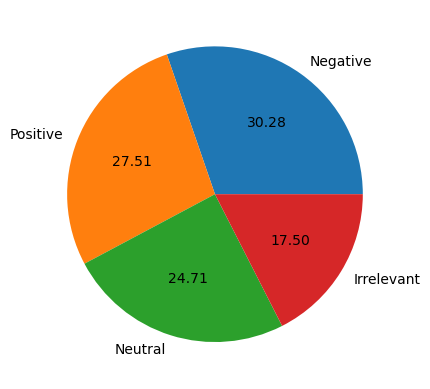

In [18]:
# Visualizing

plt.pie(data['Sentiment'].value_counts(), labels =['Negative', 'Positive','Neutral','Irrelevant'], autopct='%0.2f')
plt.show()

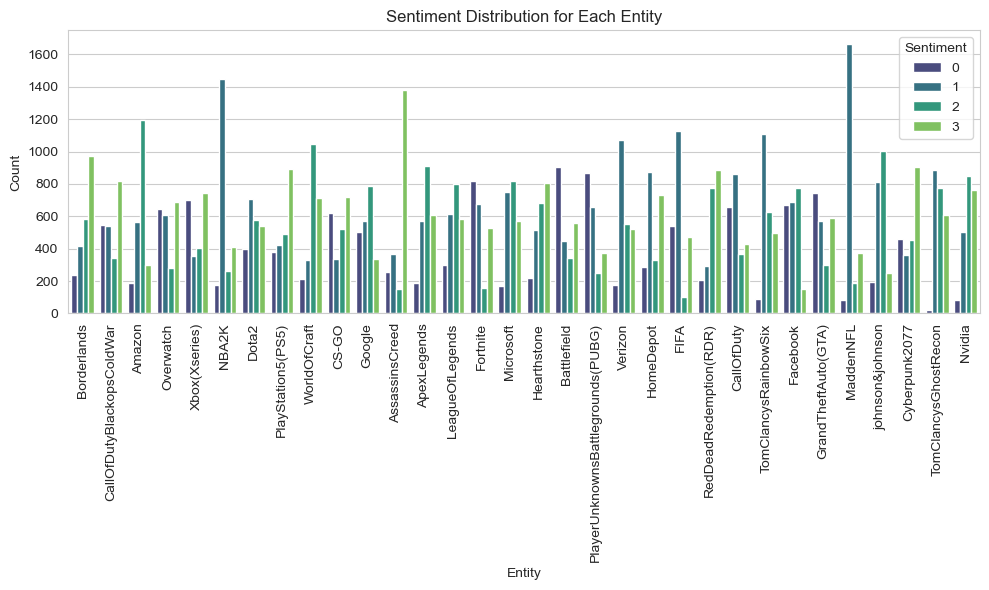

In [19]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Entity', hue='Sentiment', palette='viridis')
plt.title('Sentiment Distribution for Each Entity')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

In [20]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import re
ps = PorterStemmer()

In [21]:
from nltk.stem import WordNetLemmatizer

Lemmatizer = WordNetLemmatizer() 

In [22]:
# Cleaning the text
def transform_text(review):
    review = re.sub('[^a-zA-Z]', " ",review)
    review = review.lower()
    review = review.split()
    review = [Lemmatizer.lemmatize(word) for word in review if word not in set(stopwords.words("english"))]
    review = " ".join(review)
    corpus.append(review)   

In [23]:
def transform_text(text):
    text = re.sub('[^a-zA-Z]',' ',text)
    text = text.lower()
    text = text.split()
    text = [ps.stem(word) for word in text if word not in set(stopwords.words('english'))]
    text = ' '.join(text)
    return text

In [24]:
data['transformed_Comment'] = data['Comment'].apply(transform_text)

C:\Users\asus\AppData\Local\Temp\ipykernel_3348\2032291800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['transformed_Comment'] = data['Comment'].apply(transform_text)


In [25]:
data.head()

,Id,Entity,Sentiment,Comment,transformed_Comment
0,2401,Borderlands,3,I am coming to the borders and I will kill you...,come border kill
1,2401,Borderlands,3,im getting on borderlands and i will kill you ...,im get borderland kill
2,2401,Borderlands,3,im coming on borderlands and i will murder you...,im come borderland murder
3,2401,Borderlands,3,im getting on borderlands 2 and i will murder ...,im get borderland murder
4,2401,Borderlands,3,im getting into borderlands and i can murder y...,im get borderland murder


In [26]:
print(data['transformed_Comment'])

0                                         come border kill
1                                   im get borderland kill
2                                im come borderland murder
3                                 im get borderland murder
4                                 im get borderland murder
                               ...                        
74676    realiz window partit mac like year behind nvid...
74677    realiz mac window partit year behind nvidia dr...
74678    realiz window partit mac year behind nvidia dr...
74679    realiz window partit mac like year behind nvid...
74680    like window partit mac like year behind driver...
Name: transformed_Comment, Length: 71655, dtype: object


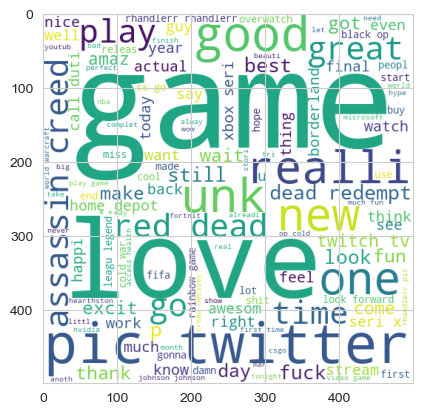

In [28]:
## Word Cloud Formation of Positive
from wordcloud import WordCloud

wc = WordCloud(width=500, height=500, min_font_size=10, background_color = 'white')

Positive_wc = wc.generate(data[data['Sentiment']== 3]['transformed_Comment'].str.cat(sep = " "))

plt.imshow(Positive_wc)

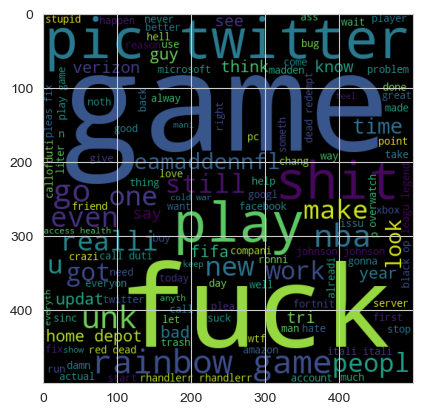

In [31]:
## Word Cloud Formation of Negative
from wordcloud import WordCloud

wc = WordCloud(width=500, height=500, min_font_size=10, background_color = 'black')

Negative_wc = wc.generate(data[data['Sentiment']== 1]['transformed_Comment'].str.cat(sep = " "))

plt.imshow(Negative_wc)

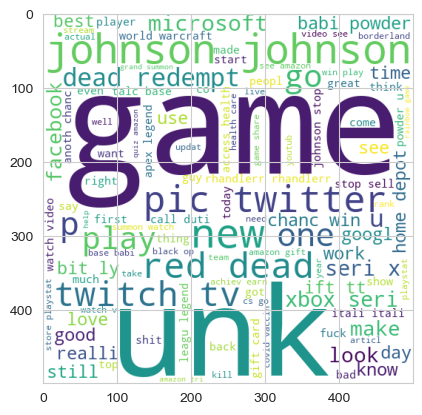

In [34]:
## Word Cloud Formation of Neutral
from wordcloud import WordCloud

wc = WordCloud(width=500, height=500, min_font_size=10, background_color = 'white')

Neutral_wc = wc.generate(data[data['Sentiment']== 2]['transformed_Comment'].str.cat(sep = " "))

plt.imshow(Neutral_wc)

# Model Building

In [35]:
X = data['transformed_Comment'].values
y = data['Sentiment'].values

In [36]:
print(X)

['come border kill' 'im get borderland kill' 'im come borderland murder'
 ... 'realiz window partit mac year behind nvidia driver idea notic'
 'realiz window partit mac like year behind nvidia driver car fuck idea ever notic'
 'like window partit mac like year behind driver idea notic']


In [37]:
print(y)

[3 3 3 ... 3 3 3]


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 2)

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()

X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

In [40]:
print(X_train)

  (0, 4700)	0.26036016324271716
  (0, 3305)	0.07816712704159443
  (0, 5830)	0.11559189868584492
  (0, 13755)	0.100479732579378
  (0, 8158)	0.19433507511525222
  (0, 12335)	0.13354180401910354
  (0, 14215)	0.15591783777487764
  (0, 17980)	0.1802336829834085
  (0, 11802)	0.19071294724999083
  (0, 15455)	0.1904330092831942
  (0, 19643)	0.15534543252405522
  (0, 5199)	0.2499745519836033
  (0, 13461)	0.19401288131977856
  (0, 12261)	0.12562769737637144
  (0, 18203)	0.4871581543150985
  (0, 3634)	0.15794997456533413
  (0, 4811)	0.1912821722091519
  (0, 2889)	0.27074577450183107
  (0, 16249)	0.18157705062278776
  (0, 13618)	0.15717840812596226
  (0, 11022)	0.10965244895460244
  (0, 9490)	0.24981225317950362
  (0, 18316)	0.27074577450183107
  (1, 151)	0.5595375382141353
  (1, 6466)	0.6819816966094295
  :	:
  (57321, 7153)	0.14335393378505978
  (57321, 3199)	0.11994216787283209
  (57321, 7337)	0.128670391880235
  (57321, 12986)	0.1520503356334033
  (57321, 11524)	0.26179605713680765
  (57321, 7

In [41]:
print(X_test)

  (0, 20139)	0.17690925818736883
  (0, 18845)	0.15321395240474886
  (0, 18468)	0.5592102220953431
  (0, 17184)	0.21290304879071553
  (0, 17003)	0.23556508330369277
  (0, 14948)	0.18790470035632842
  (0, 11898)	0.26009251575316383
  (0, 11792)	0.19479121458926632
  (0, 10261)	0.19425338412943452
  (0, 9931)	0.22709487946064325
  (0, 8157)	0.20334095604458358
  (0, 5635)	0.2876351686652166
  (0, 5443)	0.20454411125963323
  (0, 3695)	0.1952464165620074
  (0, 3392)	0.21470404449273026
  (0, 140)	0.22660255961031844
  (1, 19509)	0.34301367963702384
  (1, 12394)	0.7180556844298842
  (1, 6778)	0.6055886802441073
  (2, 19391)	0.24283008211851537
  (2, 16738)	0.38868254832351545
  (2, 15282)	0.519714575755541
  (2, 14661)	0.4149173449108006
  (2, 11524)	0.26943826990507824
  (2, 11022)	0.2454048703348598
  :	:
  (14329, 14926)	0.3321147131661189
  (14329, 14362)	0.15136681618996967
  (14329, 14305)	0.23203627352084344
  (14329, 14249)	0.2031410230561899
  (14329, 13908)	0.14923064254540253
  (1

# Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression(max_iter=1000)

In [43]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7715442048705603
[[1663  267  174  343]
 [ 105 3555  262  410]
 [ 146  357 2616  482]
 [ 146  317  265 3223]]
